# Propriedades Magnéticas da Matéria

### Modelo

In [1]:
n = 4
p = point3d([0,0,0])
rainb = ['blue','red']
for k in range(n):
    for j in range(n):
        for i in range(n):
            r = randrange(2)
            s = r - 0.5
            p += arrow3d((i,j,k-s/2), (i,j,k+s/2), color=rainb[r])
show(p)

Graphics3d Object

### Sem interação. (Evolução temporal.)

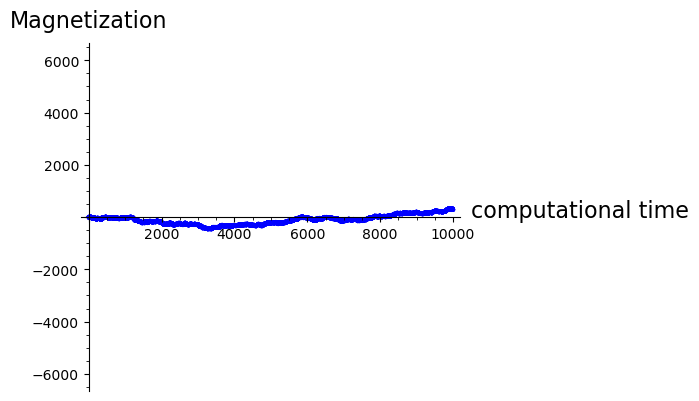

In [2]:
n=4
M=0
l=[]
for t in range(10000):
    for k in range(n):
        for j in range(n):
            for i in range(n):
                r=randrange(2)
                s=r-0.5
                M+=s
    l+=[M]
list_plot(l,ymin=-100*n^3,ymax=100*n^3,axes_labels=['computational time','Magnetization'])

### Ferromagnetismo. O modelo de Ising

In [24]:
sign(j/n-int(j/n))

1

In [6]:
N=4
n=N+2
l=[[sign(j/(n-1)-int(j/(n-1)))*sign(k/(n-1)-int(k/(n-1)))*(2*randrange(2)-1) for k in range(n)] for j in range(n)]
#for i in range(n):
#    l[0][i]=0
#    l[n-1][i]=0
#    l[i][0]=0
#    l[i][n-1]=0
m=matrix(l)
pretty_print(m)

[ 0  0  0  0  0  0]
[ 0  1 -1 -1 -1  0]
[ 0 -1 -1 -1  1  0]
[ 0 -1 -1  1 -1  0]
[ 0 -1  1 -1  1  0]
[ 0  0  0  0  0  0]

In [38]:
U=0
for j in range(1,N+1):
    for k in range(1,N+1):
        u=m[j][k]*m[j-1][k]+m[j][k]*m[j+1][k]+m[j][k]*m[j][k-1]+m[j][k]*m[j][k+1]
        print(j,k,m[j][k],u)
        U+=u
print(U)

1 1 -1 2
1 2 -1 1
1 3 -1 3
1 4 -1 2
2 1 -1 -1
2 2 1 -4
2 3 -1 0
2 4 -1 3
3 1 1 -3
3 2 -1 -2
3 3 1 -4
3 4 -1 -1
4 1 -1 0
4 2 -1 3
4 3 -1 -1
4 4 1 -2
-4


In [35]:
beta=1

In [49]:
pretty_print(m)
U=0
for j in range(1,N+1):
    for k in range(1,N+1):
        u1=m[j][k]*m[j-1][k]+m[j][k]*m[j+1][k]+m[j][k]*m[j][k-1]+m[j][k]*m[j][k+1]
        m[j,k]=-m[j,k]
        u2=m[j][k]*m[j-1][k]+m[j][k]*m[j+1][k]+m[j][k]*m[j][k-1]+m[j][k]*m[j][k+1]
        du=beta*u2-beta*u1
        if (du <= 0):
            # keep flip
            u=u2
        else:
            if (randrange(2)==0):
                #turn flip back
                m[j,k]=-m[j,k]
                u=u1
            else:
                # keep flip (even with energy increase)
                u=u2            
        U+=u
pretty_print(m)
print(U)

[ 0  0  0  0  0  0]
[ 0 -1  1 -1 -1  0]
[ 0  1  1 -1  1  0]
[ 0 -1  1 -1  1  0]
[ 0 -1  1 -1 -1  0]
[ 0  0  0  0  0  0]

[ 0  0  0  0  0  0]
[ 0 -1 -1  1  1  0]
[ 0 -1  1 -1 -1  0]
[ 0  1 -1  1  1  0]
[ 0  1  1  1 -1  0]
[ 0  0  0  0  0  0]

-12


In [43]:
m[0][0]

0

In [70]:
pretty_print(m)

m

In [50]:
from sage.plot.matrix_plot import *

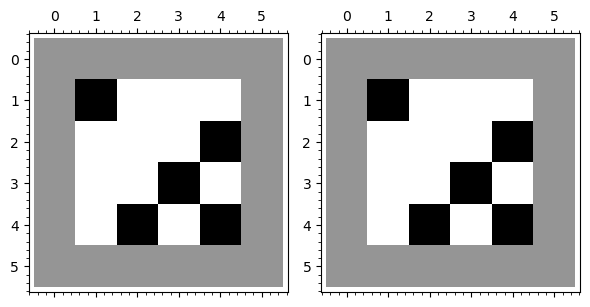

In [9]:
graphics_array((matrix_plot(m),matrix_plot(m)))